## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


### Data Ingestion

In [2]:
df = pd.read_csv('data/churn.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* There is no null values in the dataset.

In [6]:
df.columns.value_counts()

RowNumber          1
CustomerId         1
Surname            1
CreditScore        1
Geography          1
Gender             1
Age                1
Tenure             1
Balance            1
NumOfProducts      1
HasCrCard          1
IsActiveMember     1
EstimatedSalary    1
Exited             1
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Drop columns

In [10]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [11]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1932,655,Spain,Female,56,5,0.00,2,1,1,41782.70,0
1244,587,Germany,Female,38,0,132122.42,2,0,0,31730.32,0
1470,568,Germany,Female,31,1,61592.14,2,1,1,61796.64,0
2662,669,France,Female,44,8,96418.09,1,0,0,131609.48,1
2151,753,France,Male,57,7,0.00,1,1,0,159475.08,1


In [12]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

In [13]:
df = pd.get_dummies(df,drop_first = True,dtype=int)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

* This column have imbalance data

In [16]:
X = df.drop(columns=['Exited'],axis=1)
y = df['Exited']

## Handling the imbalance dataset

In [17]:
from imblearn.over_sampling import SMOTE
X_ovs, y_ovs = SMOTE().fit_resample(X,y)

### Train Test Split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X_ovs,y_ovs,test_size=0.3,random_state=42)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((11148, 11), (4778, 11), (11148,), (4778,))

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6428,627,39,5,124586.930000,1,1,0,93132.610000,1,0,0
9992,726,36,2,0.000000,1,1,0,195192.400000,0,1,1
12320,548,49,7,121534.136072,1,1,0,46562.042701,0,0,0
5896,744,30,1,128065.120000,1,1,0,121525.480000,0,1,1
11840,707,61,8,148223.899437,1,1,0,48514.236255,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
13418,690,35,3,113504.185769,1,1,0,32452.021529,0,0,1
5390,735,38,1,0.000000,3,0,0,92220.120000,0,0,0
860,667,43,8,190227.460000,1,1,0,97508.040000,0,0,1
15795,546,40,1,110723.248999,1,1,0,120296.048348,1,0,0


## Standardization

In [21]:
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train

array([[-0.24049653, -0.20411113,  0.07677024, ...,  1.76026402,
        -0.45943545, -0.84406303],
       [ 0.83794744, -0.50669503, -1.02753251, ..., -0.5680966 ,
         2.17658432,  1.18474565],
       [-1.10107302,  0.80450186,  0.81297208, ..., -0.5680966 ,
        -0.45943545, -0.84406303],
       ...,
       [ 0.19523841,  0.19933406,  1.18107299, ..., -0.5680966 ,
        -0.45943545,  1.18474565],
       [-1.12285977, -0.10324983, -1.39563343, ...,  1.76026402,
        -0.45943545, -0.84406303],
       [ 0.52203961,  1.00622446, -1.39563343, ...,  1.76026402,
        -0.45943545,  1.18474565]])

## Model Training

In [47]:
lr_model = LogisticRegression(penalty='l1',solver='liblinear')
rf_model = RandomForestClassifier(max_depth=11,n_estimators=25,random_state=21)
dt_model = DecisionTreeClassifier(criterion='log_loss',splitter='best',max_depth=18)
gb_model = GradientBoostingClassifier(n_estimators=38,learning_rate=0.7,min_samples_split=23,max_depth=23)

## Model Testing

### Logistic regression model 

In [25]:
lr_model.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [26]:
y_pred_lr = lr_model.predict(X_train)
lr_accuracy_train = accuracy_score(y_train, y_pred_lr)
print('Training Accuracy of LogisticRegression : ',lr_accuracy_train)

y_pred_lr1 = lr_model.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, y_pred_lr1)
print('Testing Accuracy of LogisticRegression :',lr_accuracy_test)

Training Accuracy of LogisticRegression :  0.7778076785073555
Testing Accuracy of LogisticRegression : 0.7804520719966513


### RandomForestClassifier model

In [27]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=11, n_estimators=25, random_state=21)

In [28]:
y_pred_rf = rf_model.predict(X_train)
rf_accuracy_train = accuracy_score(y_train, y_pred_rf)
print('Training Accuracy of RandomForestClassifier : ',rf_accuracy_train)

y_pred_rf1 = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, y_pred_rf1)
print('Testing Accuracy of RandomForestClassifier :',rf_accuracy_test)

Training Accuracy of RandomForestClassifier :  0.9139756010046645
Testing Accuracy of RandomForestClassifier : 0.8428212641272499


### Decision Tree Classifier model

In [29]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=18)

In [30]:
y_pred_dt = dt_model.predict(X_train)
dt_accuracy_train = accuracy_score(y_train, y_pred_dt)
print('Training Accuracy of DecisionTreeClassifier : ',dt_accuracy_train)

y_pred_dt1 = dt_model.predict(X_test)
dt_accuracy_test = accuracy_score(y_test, y_pred_dt1)
print('Testing Accuracy of DecisionTreeClassifier :',dt_accuracy_test)

Training Accuracy of DecisionTreeClassifier :  0.9910297811266595
Testing Accuracy of DecisionTreeClassifier : 0.7844286312264546


### Gradient Boost Classifier model

In [48]:
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=23,
                           min_samples_split=23, n_estimators=38)

In [49]:
y_pred_gb = gb_model.predict(X_train)
gb_accuracy_train = accuracy_score(y_train, y_pred_gb)
print('Training Accuracy of GradientBoostingClassifier : ',dt_accuracy_train)

y_pred_gb1 = gb_model.predict(X_test)
gb_accuracy_test = accuracy_score(y_test, y_pred_gb1)
print('Testing Accuracy of GradientBoostingClassifier :',gb_accuracy_test)

Training Accuracy of GradientBoostingClassifier :  0.9910297811266595
Testing Accuracy of GradientBoostingClassifier : 0.8601925491837589


## Visualization for accuracy score of models

In [50]:
Accuracy_summary = pd.DataFrame({
    'Model':['LR','RF','DT','GBC'],
    'ACC':[accuracy_score(y_test,y_pred_lr1),
           accuracy_score(y_test,y_pred_rf1),
           accuracy_score(y_test,y_pred_dt1),
           accuracy_score(y_test,y_pred_gb1)
          ]
})

In [51]:
Accuracy_summary

,Model,ACC
0,LR,0.780452
1,RF,0.842821
2,DT,0.784429
3,GBC,0.860193


<Axes: xlabel='Model', ylabel='ACC'>

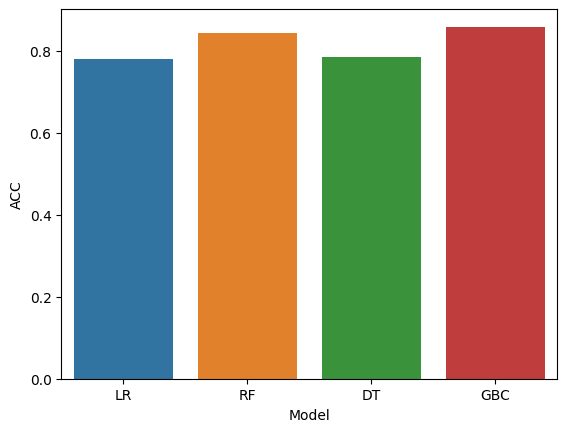

In [35]:
sns.barplot(x=Accuracy_summary['Model'],y=Accuracy_summary['ACC'], hue=Accuracy_summary['Model'], legend=False)

* GradientBoostingClassifier gives good accuracy on test data :86

## Dump pickle file 

In [52]:
import pickle
pickle.dump(scaler,open('model/preprocessor.pkl','wb'))

In [53]:
import pickle
pickle.dump(gb_model,open('model/rfmodel.pkl','wb'))


In [38]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [39]:
df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9092,781,38,2,117810.79,1,0,1,65632.33,1,0,0,1
9128,693,43,1,121927.92,1,1,0,87994.95,1,1,0,0
3274,629,31,6,0.00,1,1,1,16447.60,1,0,0,0
3972,536,22,5,89492.62,1,0,0,42934.43,0,0,0,0
6464,564,33,2,115761.51,1,0,1,112350.21,1,1,0,0
